In [1]:
import os
os.getcwd()

'/Users/sugakubunka/Documents/umezaki/bunka/pythonML'

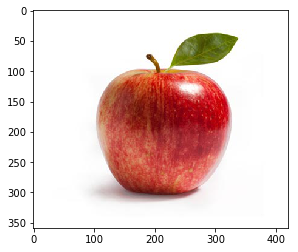

In [3]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt

img = load_img("./image/apple/0000.jpg")
plt.imshow(img)
plt.show()

In [4]:
import os
labels = os.listdir('./image')[1:]
labels

['apple', 'grape', 'lemon', 'melon', 'orange', 'strawberry', 'tomato']

In [5]:
img = []
y = []
for d in range(len(labels)):
    for f in os.listdir('./image/' + labels[d]):
        if f[-1] == 'g':
            img.append(img_to_array(load_img('./image/' + labels[d] + '/' + f,
                                             target_size=(100,100)))/255)
            y.append(d)
        
import numpy as np
X = np.array(img)

In [6]:
X.shape

(721, 100, 100, 3)

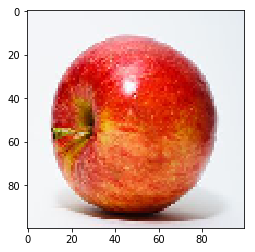

In [7]:
plt.imshow(array_to_img(X[30,:,:,:]))
plt.show()

試しにロジスティック回帰してみる

In [9]:
from sklearn.model_selection import train_test_split

X_tr = X.reshape(X.shape[0],-1)
X_train, X_test, y_train, y_test = train_test_split(X_tr, y,
                                                    random_state=42,
                                                    test_size=0.1)

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
clf.score(X_test, y_test)

0.73972602739726023

次にCNNを試してみる

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
__________

In [13]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
648/648 [==============================] - 21s - loss: 1.6807 - acc: 0.2932    
Epoch 2/10
648/648 [==============================] - 20s - loss: 1.2263 - acc: 0.5046    
Epoch 3/10
648/648 [==============================] - 21s - loss: 1.0189 - acc: 0.5941    
Epoch 4/10
648/648 [==============================] - 23s - loss: 0.8322 - acc: 0.6790    
Epoch 5/10
648/648 [==============================] - 23s - loss: 0.7356 - acc: 0.7330    
Epoch 6/10
648/648 [==============================] - 22s - loss: 0.7626 - acc: 0.7222    
Epoch 7/10
648/648 [==============================] - 25s - loss: 0.6568 - acc: 0.7608    
Epoch 8/10
648/648 [==============================] - 24s - loss: 0.4912 - acc: 0.8333    
Epoch 9/10
648/648 [==============================] - 23s - loss: 0.3899 - acc: 0.8750    
Epoch 10/10
648/648 [==============================] - 22s - loss: 0.3357 - acc: 0.8827    


In [15]:
model.evaluate(X_test, y_test)

73/73 [==============================] - 1s     


[0.37848480433633885, 0.89041095972061157]